<a href="https://colab.research.google.com/github/jitendra-40078/USA_Home_Price_Home.LLC_Assessment/blob/main/USA_Home_Price_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Content**

### **1. Summary**
### **2. About Datasets**
### **3. Data Processing**
### **4. Data Analysis and Visualization**
### **5. Data Modelling**
### **6. Finding**

## **Summary**

In this task, I successfully collected and utilized publicly available datasets to address the impact of key supply-demand factors on US home prices over the last 20 years. To ensure a comprehensive analysis, I gathered historical data from 1987 onward, allowing for a robust examination of long-term trends. I used the S&P Case-Schiller Home Price Index as a reliable proxy for home prices. Through data science modeling techniques, I explored the relationships between this index and various supply-demand factors, such as mortgage rates, unemployment rates, building permits, population growth, and relevant economic indicators. My analysis aimed to uncover the driving forces behind home price fluctuations, contributing valuable insights for understanding the dynamics of the US housing market over the past two decades

## **About Datasets**

I've downloaded a total of 17 CSV files from FRED (Federal Reserve Economic Data). These files fall into four different categories. The first set contains data collected on a monthly basis, the second set on a quarterly basis, and the third set on an annual basis. All of this data has been collected since 1987. The fourth category consists of quarterly data, which has been collected since the year 2000.

#### **1. Monthly Basis collected datasets**

*   Population
*   Consumer Price Index
*   Customer Sentiment Index
*   Mortgage Rate
*   M3
*   Unemployment Rate
*   Employment Rate
*   New House Permit
*   Single House Permit
*   More Than 5 Unit House Prmit
*   Mortgage Orgnization fees & discount
*   Home Price Index

#### **2. Quarterly Basis Collected Datasets**

*   Gross Domestic Product
*   Gross Domestic Income

#### **3. Yearly Basis Collected Datasets**

*   Human Capital Index
*   Inflation Data

#### **4. Quaterly Basis Collected data since 2000**

*   Number of House



## **Data Processing**

#### **Mounting Google drive on colab**

In [10]:
# Import the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mount (connect) your Google Drive to this Colab notebook
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

####  **Loading All Data**

In [ ]:
# Load the 'Population.csv' file from Google Drive into a DataFrame
population_df = pd.read_csv('/content/drive/MyDrive/Population.csv')

# Load the 'Consumer Price index.csv' file from Google Drive into a DataFrame
Consumer_price_index_df = pd.read_csv('/content/drive/MyDrive/Cunsumer Price index.csv')

# Load the 'Total New house permit.csv' file from Google Drive into a DataFrame
new_house_permit_df = pd.read_csv("/content/drive/MyDrive/Total New house permit.csv")

# Load the 'single family house permit.csv' file from Google Drive into a DataFrame
single_house_permit = pd.read_csv("/content/drive/MyDrive/single family house permit.csv")

# Load the '5 units house permit.csv' file from Google Drive into a DataFrame
more_than_5_unit_house_permit = pd.read_csv("/content/drive/MyDrive/5 units house permit.csv")

# Load the 'Employment_rate.csv' file from Google Drive into a DataFrame
employment_rate = pd.read_csv("/content/drive/MyDrive/Employment_rate.csv")

# Load the 'unemployment rate.csv' file from Google Drive into a DataFrame
unemployment_rate = pd.read_csv("/content/drive/MyDrive/unemployment rate.csv")

# Load the 'm3.csv' file from Google Drive into a DataFrame
m3_df = pd.read_csv("/content/drive/MyDrive/m3.csv")

# Load the 'consumer sentiment index.csv' file from Google Drive into a DataFrame
customer_sentiment_df = pd.read_csv("/content/drive/MyDrive/consumer sentiment index.csv")

# Load the 'Home price index.csv' file from Google Drive into a DataFrame
home_price_index = pd.read_csv("/content/drive/MyDrive/Home price index.csv")

# Load the 'Mortgage orgnition fee and dicounts.csv' file from Google Drive into a DataFrame
Mortgage_org_fees_discount_df = pd.read_csv("/content/drive/MyDrive/Mortgage orgnition fee and dicounts.csv")

# Load the 'Human capital index.csv' file from Google Drive into a DataFrame
human_capital_index_df = pd.read_csv("/content/drive/MyDrive/Human capital index.csv")

# Load the 'Housing Inventory Estimate Total Housing Units in the United States.csv' file from Google Drive into a DataFrame
number_of_house_df = pd.read_csv("/content/drive/MyDrive/Housing Inventory Estimate Total Housing Units in the United States.csv")

# Load the 'Mortgage_rate.csv' file from Google Drive into a DataFrame
mortgage_rate = pd.read_csv("/content/drive/MyDrive/Mortgage_rate.csv")

# Load the 'Gross domestic income.csv' file from Google Drive into a DataFrame
GDI_df = pd.read_csv("/content/drive/MyDrive/Gross domestic income.csv")

# Load the 'GDP.csv' file from Google Drive into a DataFrame
GDP_df = pd.read_csv("/content/drive/MyDrive/GDP.csv")

# Load the 'inflation_data.csv' file from Google Drive into a DataFrame
inflation_df = pd.read_csv('/content/drive/MyDrive/inflation_data.csv')


#### **Overview of Population dataset**


In [ ]:
# Print top 5 row
population_df.head()

,DATE,POPTHM
0,1987-01-01,241857.0
1,1987-02-01,242005.0
2,1987-03-01,242166.0
3,1987-04-01,242338.0
4,1987-05-01,242516.0


In [ ]:
# print size of dataset
population_df.shape

(439, 2)

In [ ]:
#check data types
population_df.dtypes

DATE       object
POPTHM    float64
dtype: object

In [ ]:
# Checking Null values
population_df.isnull().sum()

DATE      0
POPTHM    0
dtype: int64

In [ ]:
#checking duplicates
population_df.duplicated().sum()

0

#### **Overview of Cunsumer Price index dataset**


In [ ]:
# print top 5 row
Consumer_price_index_df.head()

,DATE,CPALTT01USM657N
0,1987-01-01,0.633484
1,1987-02-01,0.359712
2,1987-03-01,0.448029
3,1987-04-01,0.535236
4,1987-05-01,0.354925


In [ ]:
# print size of dataset
Consumer_price_index_df.shape

(438, 2)

In [ ]:
# check data types
Consumer_price_index_df.dtypes

DATE                object
CPALTT01USM657N    float64
dtype: object

In [ ]:
# check null values
Consumer_price_index_df.isnull().sum()

DATE               0
CPALTT01USM657N    0
dtype: int64

In [ ]:
# check duplicate
Consumer_price_index_df.duplicated().sum()

0

#### **Overview of New house permit dataset**

In [ ]:
# print top 5 row
new_house_permit_df.head()

,DATE,PERMIT
0,1987-01-01,1690.0
1,1987-02-01,1689.0
2,1987-03-01,1704.0
3,1987-04-01,1601.0
4,1987-05-01,1500.0


In [ ]:
# print size of dataset
new_house_permit_df.shape

(439, 2)

In [ ]:
# check data types
new_house_permit_df.dtypes

DATE       object
PERMIT    float64
dtype: object

In [ ]:
# check null values
new_house_permit_df.isnull().sum()


DATE      0
PERMIT    0
dtype: int64

In [ ]:
# check duplicates
new_house_permit_df.duplicated().sum()

0

#### **Overview of single house permit dataset**

In [ ]:
# print top 5 row
single_house_permit.head()

,DATE,PERMIT1
0,1987-01-01,1088.0
1,1987-02-01,1195.0
2,1987-03-01,1132.0
3,1987-04-01,1057.0
4,1987-05-01,1006.0


In [ ]:
# print shape of dataset
print(single_house_permit.shape)

# print data types of dataset
print(single_house_permit.dtypes)

(439, 2)
DATE        object
PERMIT1    float64
dtype: object


In [ ]:
# check null values
print(single_house_permit.isnull().sum())

# check duplicates
print(single_house_permit.duplicated().sum())

DATE       0
PERMIT1    0
dtype: int64
0


#### **Overview of more than 5 unit house permit dataset**

In [ ]:
# print top 5 row
more_than_5_unit_house_permit.head()

,DATE,PERMIT5
0,1987-01-01,502.0
1,1987-02-01,391.0
2,1987-03-01,475.0
3,1987-04-01,447.0
4,1987-05-01,403.0


In [ ]:
# print shape of dataset
print(more_than_5_unit_house_permit.shape)

# print data types of dataset
print(more_than_5_unit_house_permit.dtypes)

(439, 2)
DATE        object
PERMIT5    float64
dtype: object


In [ ]:
# check null values
print(more_than_5_unit_house_permit.isnull().sum())
# check duplicates
print(more_than_5_unit_house_permit.duplicated().sum())

DATE       0
PERMIT5    0
dtype: int64
0


#### **Overview of employment rate dataset**

In [ ]:
# print top 5 row
employment_rate.head()

,DATE,LREM64TTUSM156S
0,1987-01-01,70.164507
1,1987-02-01,70.290528
2,1987-03-01,70.323792
3,1987-04-01,70.500492
4,1987-05-01,70.811981


In [ ]:
# print shape of dataset
employment_rate.shape

(438, 2)

In [ ]:
# print data types of dataset
employment_rate.dtypes

DATE                object
LREM64TTUSM156S    float64
dtype: object

In [ ]:
# check null values
employment_rate.isnull().sum()

DATE               0
LREM64TTUSM156S    0
dtype: int64

#### **Overview of unemployment rate dataset**

In [ ]:
# print top 5 row
unemployment_rate.head()

,DATE,UNRATE
0,1987-01-01,6.6
1,1987-02-01,6.6
2,1987-03-01,6.6
3,1987-04-01,6.3
4,1987-05-01,6.3


In [ ]:
# print shape of dataset
unemployment_rate.shape

(440, 2)

In [ ]:
# print data types of dataset
unemployment_rate.dtypes

DATE       object
UNRATE    float64
dtype: object

In [ ]:
# check null values
unemployment_rate.isnull().sum()

DATE      0
UNRATE    0
dtype: int64

In [ ]:
# check duplicates
unemployment_rate.duplicated().sum()

0

  #### **Overview of m3 dataset**

In [ ]:
# print top 5 row
m3_df.head()

,DATE,m3
0,1987-01,2.743900e+12
1,1987-02,2.747500e+12
2,1987-03,2.753700e+12
3,1987-04,2.767700e+12
4,1987-05,2.772900e+12


In [ ]:
# print shape of dataset
m3_df.shape

(438, 2)

In [ ]:
# print data types of dataset
m3_df.dtypes

DATE                object
MABMM301USM189S    float64
dtype: object

In [ ]:
# check null values
m3_df.isnull().sum()

DATE               0
MABMM301USM189S    0
dtype: int64

#### **Over view of Customer Sentiment data**

In [ ]:
# print top 5 row
customer_sentiment_df.head()

,DATE,UMCSENT
0,1987-01-01,90.4
1,1987-02-01,90.2
2,1987-03-01,90.8
3,1987-04-01,92.8
4,1987-05-01,91.1


In [ ]:
# print shape of dataset
customer_sentiment_df.shape

(439, 2)

In [ ]:
# print data types of dataset
customer_sentiment_df.dtypes

DATE        object
UMCSENT    float64
dtype: object

In [ ]:
# check null values
customer_sentiment_df.isnull().sum()

DATE       0
UMCSENT    0
dtype: int64

In [ ]:
# check duplicates
customer_sentiment_df.duplicated().sum()

0

#### **Overview of home price index dataset**

In [ ]:
# print top 5 row
home_price_index.head()

,DATE,hpi
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.735
3,1987-04-01,65.131
4,1987-05-01,65.563


In [ ]:
# print shape of dataset
home_price_index.shape

(438, 2)

In [ ]:
# print data types of dataset
home_price_index.dtypes

DATE          object
CSUSHPISA    float64
dtype: object

In [ ]:
# check null values
home_price_index.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

In [ ]:
# check duplicates
home_price_index.duplicated().sum()

0

#### **Over view of Mortgage Organizational fees & discount dataset**

In [ ]:
# print top 5 row
Mortgage_org_fees_discount_df.head()

,DATE,MORTPTS30US
0,1987-01-02,2.20
1,1987-01-09,2.20
2,1987-01-16,2.10
3,1987-01-23,2.20
4,1987-01-30,2.20


In [ ]:
# print shape of dataset
Mortgage_org_fees_discount_df.shape

(1900, 2)

In [ ]:
# print data types of dataset
Mortgage_org_fees_discount_df.dtypes

DATE           object
MORTPTS30US    object
dtype: object

In [ ]:
# check null values
Mortgage_org_fees_discount_df.isnull().sum()

DATE           0
MORTPTS30US    0
dtype: int64

In [ ]:
# check duplicates
Mortgage_org_fees_discount_df.duplicated().sum()

0

#### **Overview of Human capital index dataset**

In [ ]:
# print top 5 row
human_capital_index_df.head()

,DATE,HCIYISUSA066NRUG
0,1987-01-01,3.408786
1,1988-01-01,3.417534
2,1989-01-01,3.426304
3,1990-01-01,3.435097
4,1991-01-01,3.452302


In [ ]:
# print shape of dataset
human_capital_index_df.shape

(33, 2)

In [ ]:
# print data types of dataset
human_capital_index_df.dtypes

DATE                 object
HCIYISUSA066NRUG    float64
dtype: object

In [ ]:
# check null values
human_capital_index_df.isnull().sum()

DATE                0
HCIYISUSA066NRUG    0
dtype: int64

In [ ]:
# check duplicates
human_capital_index_df.duplicated().sum()

0

#### **Over view of Number of house in USA dataset**

In [ ]:
# print top 5 row
number_of_house_df.head()

,DATE,ETOTALUSQ176N
0,2000-04-01,116047.0
1,2000-07-01,116482.0
2,2000-10-01,116914.0
3,2001-01-01,117347.0
4,2001-04-01,117786.0


In [ ]:
# print shape of dataset
number_of_house_df.shape

(93, 2)

In [ ]:
# print data types of dataset
number_of_house_df.dtypes

DATE              object
ETOTALUSQ176N    float64
dtype: object

In [ ]:
# check null values
number_of_house_df.isnull().sum()

DATE             0
ETOTALUSQ176N    0
dtype: int64

In [ ]:
# check duplicates
number_of_house_df.duplicated().sum()

0

#### **Overview of Mortgage Rate dataset**

In [ ]:
# print top 5 row
mortgage_rate.head()

,DATE,MORTGAGE30US
0,1987-01-02,9.37
1,1987-01-09,9.32
2,1987-01-16,9.21
3,1987-01-23,9.04
4,1987-01-30,9.08


In [ ]:
# print shape of dataset
mortgage_rate.shape

(1914, 2)

In [ ]:
# print data types of dataset
mortgage_rate.dtypes

DATE             object
MORTGAGE30US    float64
dtype: object

In [ ]:
# check null values
mortgage_rate.isnull().sum()

DATE            0
MORTGAGE30US    0
dtype: int64

In [ ]:
# check duplicates
mortgage_rate.duplicated().sum()

0

#### **Overview of Gross Domestic Income dataset**

In [ ]:
# print top 5 row
GDI_df.head()

,DATE,GDI
0,1987-01-01,4652.187
1,1987-04-01,4759.142
2,1987-07-01,4864.953
3,1987-10-01,4969.278
4,1988-01-01,5068.055


In [ ]:
# print shape of dataset
GDI_df.shape

(146, 2)

In [ ]:
# print data types of dataset
GDI_df.dtypes

DATE     object
GDI     float64
dtype: object

In [ ]:
# check null values
GDI_df.isnull().sum()

DATE    0
GDI     0
dtype: int64

In [ ]:
# check duplicates
GDI_df.duplicated().sum()

0

#### **Overview of Gross Domestice Product Dataset**

In [ ]:
# print top 5 row
GDP_df.head()

,DATE,GDP
0,1987-01-01,4722.156
1,1987-04-01,4806.160
2,1987-07-01,4884.555
3,1987-10-01,5007.994
4,1988-01-01,5073.372


In [ ]:
# print shape of dataset
GDP_df.tail()

,DATE,GDP
141,2022-04-01,25248.476
142,2022-07-01,25723.941
143,2022-10-01,26137.992
144,2023-01-01,26529.774
145,2023-04-01,26798.605


In [ ]:
# print shape of dataset
GDP_df.shape

(144, 2)

In [ ]:
# check data types
GDP_df.dtypes

DATE     object
GDP     float64
dtype: object

In [ ]:
# check null values
GDP_df.isnull().sum()

DATE    0
GDP     0
dtype: int64

In [ ]:
# check duplicates values
GDP_df.duplicated().sum()

0

#### **Overview of inflation data**

In [ ]:
# print top 5 row
inflation_df.head()

,year,amount,inflation rate
0,1970-01-01 00:00:00.000001987,1.00,0.04
1,1970-01-01 00:00:00.000001988,1.04,0.04
2,1970-01-01 00:00:00.000001989,1.09,0.05
3,1970-01-01 00:00:00.000001990,1.15,0.05
4,1970-01-01 00:00:00.000001991,1.20,0.04


In [ ]:
# print shape of dateset
inflation_df.shape

(37, 3)

In [ ]:
# check null values
inflation_df.isnull().sum()

year              0
amount            0
inflation rate    0
dtype: int64

In [ ]:
# check duplicates
inflation_df.duplicated().sum()

0

## **Change the data type of date in every data set**

In [ ]:
# Convert the 'DATE' column in the 'GDP_df' DataFrame to datetime format
GDP_df['DATE'] = pd.to_datetime(GDP_df['DATE'])

# Convert the 'DATE' column in the 'GDI_df' DataFrame to datetime format
GDI_df['DATE'] = pd.to_datetime(GDI_df['DATE'])

# Convert the 'DATE' column in the 'mortgage_rate' DataFrame to datetime format
mortgage_rate['DATE'] = pd.to_datetime(mortgage_rate['DATE'])

# Convert the 'DATE' column in the 'number_of_house_df' DataFrame to datetime format
number_of_house_df['DATE'] = pd.to_datetime(number_of_house_df['DATE'])

# Convert the 'DATE' column in the 'human_capital_index_df' DataFrame to datetime format
human_capital_index_df['DATE'] = pd.to_datetime(human_capital_index_df['DATE'])

# Convert the 'DATE' column in the 'Mortgage_org_fees_discount_df' DataFrame to datetime format
Mortgage_org_fees_discount_df['DATE'] = pd.to_datetime(Mortgage_org_fees_discount_df['DATE'])

# Convert the 'DATE' column in the 'home_price_index' DataFrame to datetime format
home_price_index['DATE'] = pd.to_datetime(home_price_index['DATE'])

# Convert the 'DATE' column in the 'customer_sentiment_df' DataFrame to datetime format
customer_sentiment_df['DATE'] = pd.to_datetime(customer_sentiment_df['DATE'])

# Convert the 'DATE' column in the 'm3_df' DataFrame to datetime format
m3_df['DATE'] = pd.to_datetime(m3_df['DATE'])

# Convert the 'DATE' column in the 'unemployment_rate' DataFrame to datetime format
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])

# Convert the 'DATE' column in the 'employment_rate' DataFrame to datetime format
employment_rate['DATE'] = pd.to_datetime(employment_rate['DATE'])

# Convert the 'DATE' column in the 'more_than_5_unit_house_permit' DataFrame to datetime format
more_than_5_unit_house_permit['DATE'] = pd.to_datetime(more_than_5_unit_house_permit['DATE'])

# Convert the 'DATE' column in the 'single_house_permit' DataFrame to datetime format
single_house_permit['DATE'] = pd.to_datetime(single_house_permit['DATE'])

# Convert the 'DATE' column in the 'new_house_permit_df' DataFrame to datetime format
new_house_permit_df['DATE'] = pd.to_datetime(new_house_permit_df['DATE'])

# Convert the 'DATE' column in the 'population_df' DataFrame to datetime format
population_df['DATE'] = pd.to_datetime(population_df['DATE'])

# Convert the 'DATE' column in the 'Consumer_price_index_df' DataFrame to datetime format
Consumer_price_index_df['DATE'] = pd.to_datetime(Consumer_price_index_df['DATE'])

# Convert the 'year' column in the 'inflation_df' DataFrame to datetime format with a specified format ('%Y')
inflation_df['year'] = pd.to_datetime(inflation_df['year'], format='%Y')


In [ ]:
# Convert the 'MORTPTS30US' column to numeric values in the 'Mortgage_org_fees_discount_df' DataFrame
# If any value cannot be converted to a numeric type, set it to NaN (Not a Number)
Mortgage_org_fees_discount_df['MORTPTS30US'] = pd.to_numeric(Mortgage_org_fees_discount_df['MORTPTS30US'], errors='coerce')


## **Change the column name**

In [ ]:
# Rename the 'POPTHM' column to 'population' in the 'population_df' DataFrame
population_df.rename(columns={'POPTHM': 'population'}, inplace=True)

# Rename the 'CPALTT01USM657N' column to 'Consumer_price_index' in the 'Consumer_price_index_df' DataFrame
Consumer_price_index_df.rename(columns={'CPALTT01USM657N': 'Consumer_price_index'}, inplace=True)

# Rename the 'LREM64TTUSM156S' column to 'employment_rate' in the 'employment_rate' DataFrame
employment_rate.rename(columns={'LREM64TTUSM156S': 'employment_rate'}, inplace=True)

# Rename the 'UNRATE' column to 'unemployment_rate' in the 'unemployment_rate' DataFrame
unemployment_rate.rename(columns={'UNRATE': 'unemployment_rate'}, inplace=True)

# Rename the 'MABMM301USM189S' column to 'm3' in the 'm3_df' DataFrame
m3_df.rename(columns={'MABMM301USM189S': 'm3'}, inplace=True)

# Rename the 'UMCSENT' column to 'Customer_sentiment_index' in the 'customer_sentiment_df' DataFrame
customer_sentiment_df.rename(columns={'UMCSENT': 'Customer_sentiment_index'}, inplace=True)

# Rename the 'CSUSHPISA' column to 'Home_price_index' in the 'home_price_index' DataFrame
home_price_index.rename(columns={'CSUSHPISA': 'Home_price_index'}, inplace=True)

# Rename the 'MORTPTS30US' column to 'Mort_org_fee&discount' in the 'Mortgage_org_fees_discount_df' DataFrame
Mortgage_org_fees_discount_df.rename(columns={'MORTPTS30US': 'Mort_org_fee&discount'}, inplace=True)

# Rename the 'HCIYISUSA066NRUG' column to 'Human_capital_index' in the 'human_capital_index_df' DataFrame
human_capital_index_df.rename(columns={'HCIYISUSA066NRUG': 'Human_capital_index'}, inplace=True)

# Rename the 'MORTGAGE30US' column to 'mortgage_rate' in the 'mortgage_rate' DataFrame
mortgage_rate.rename(columns={'MORTGAGE30US': 'mortgage_rate'}, inplace=True)

# Rename the 'ETOTALUSQ176N' column to 'Total_house' in the 'number_of_house_df' DataFrame
number_of_house_df.rename(columns={'ETOTALUSQ176N': 'Total_house'}, inplace=True)

# Rename the 'amount' column to '$1 adjusted for inflation' in the 'inflation_df' DataFrame
inflation_df.rename(columns={'amount': '$1 adjusted for inflation'}, inplace=True)

# Rename the 'year' column to 'DATE' in the 'inflation_df' DataFrame
inflation_df.rename(columns={'year': 'DATE'}, inplace=True)


## **Grouping data from day to monthly basis**

### Here we are going to group by month using the DATE colum

In [ ]:
# Group the 'mortgage_rate' DataFrame by month using the 'DATE' column
# Calculate the mean mortgage rate for each month
# Reset the index to make the result a DataFrame
mortgage_rate = mortgage_rate.groupby(mortgage_rate['DATE'].dt.to_period('M'))['mortgage_rate'].mean().reset_index()

# Convert the 'DATE' column to a timestamp format (removing the day information)
mortgage_rate['DATE'] = mortgage_rate['DATE'].dt.to_timestamp()

# Display the first few rows of the modified 'mortgage_rate' DataFrame
mortgage_rate.head()


,DATE,mortgage_rate
0,1987-01-01,9.2040
1,1987-02-01,9.0825
2,1987-03-01,9.0350
3,1987-04-01,9.8325
4,1987-05-01,10.5960


In [ ]:
# print size
mortgage_rate.shape

(440, 2)

In [ ]:
# Group the 'Mortgage_org_fees_discount_df' DataFrame by month using the 'DATE' column
# Calculate the mean of the 'Mort_org_fee&discount' column for each month
# Reset the index to make the result a DataFrame
Mortgage_org_fees_discount_df = Mortgage_org_fees_discount_df.groupby(Mortgage_org_fees_discount_df['DATE'].dt.to_period('M'))['Mort_org_fee&discount'].mean().reset_index()

# Convert the 'DATE' column to a timestamp format (removing the day information)
Mortgage_org_fees_discount_df['DATE'] = Mortgage_org_fees_discount_df['DATE'].dt.to_timestamp()

# Display the first few rows of the modified 'Mortgage_org_fees_discount_df' DataFrame
Mortgage_org_fees_discount_df.head()


,DATE,Mort_org_fee&discount
0,1987-01-01,2.18
1,1987-02-01,2.10
2,1987-03-01,2.05
3,1987-04-01,2.25
4,1987-05-01,2.26


In [ ]:
# Apply a lambda function to format the values in the 'm3' column
m3_df['m3'] = m3_df['m3'].apply(lambda x: '{:.2f}'.format(x / 1e12))

# Display the first few rows of the modified 'm3_df' DataFrame
m3_df.head()


,DATE,m3
0,1987-01-01,2.74
1,1987-02-01,2.75
2,1987-03-01,2.75
3,1987-04-01,2.77
4,1987-05-01,2.77


#### **Here we will merge all monthly data and create a dataset merged_df1**

In [ ]:
# List of DataFrames to be merged
dataframes_to_merge = [
    population_df,
    Consumer_price_index_df,
    customer_sentiment_df,
    mortgage_rate,
    m3_df,
    unemployment_rate,
    employment_rate,
    new_house_permit_df,
    single_house_permit,
    more_than_5_unit_house_permit,
    Mortgage_org_fees_discount_df,
    home_price_index
]

# Initialize the merged DataFrame with the first DataFrame in the list
merged_df1 = dataframes_to_merge[0]

# Loop through the remaining DataFrames in the list and merge them with the initialized DataFrame
for df in dataframes_to_merge[1:]:
    # pd.merge combines DataFrames using an outer join on the 'DATE' column
    # 'how='outer'' means that all rows with matching 'DATE' values are included, and missing values are filled with NaN
    merged_df1 = pd.merge(merged_df1, df, on='DATE', how='outer')


In [ ]:
# print top 5 row
merged_df1.head()

,DATE,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount,Home_price_index
0,1987-01-01,241857.0,0.633484,90.4,9.2040,2.74,6.6,70.164507,1690.0,1088.0,502.0,2.18,63.965
1,1987-02-01,242005.0,0.359712,90.2,9.0825,2.75,6.6,70.290528,1689.0,1195.0,391.0,2.10,64.424
2,1987-03-01,242166.0,0.448029,90.8,9.0350,2.75,6.6,70.323792,1704.0,1132.0,475.0,2.05,64.735
3,1987-04-01,242338.0,0.535236,92.8,9.8325,2.77,6.3,70.500492,1601.0,1057.0,447.0,2.25,65.131
4,1987-05-01,242516.0,0.354925,91.1,10.5960,2.77,6.3,70.811981,1500.0,1006.0,403.0,2.26,65.563


In [ ]:
# print the size of dataset
merged_df1.shape

(440, 13)

#### **Here we merge all quaterly data and create merged_df2 dataset**

##### we convert the home price index data from monthly to quaterly

In [ ]:
# Group the 'home_price_index' DataFrame by quarter using the 'DATE' column
# Calculate the mean of the 'Home_price_index' column for each quarter
# Reset the index to make the result a DataFrame
home_price_index_1 = home_price_index.groupby(home_price_index['DATE'].dt.to_period('Q'))['Home_price_index'].mean().reset_index()

# Convert the 'DATE' column to a timestamp format (removing the day and month information)
home_price_index_1['DATE'] = home_price_index_1['DATE'].dt.to_timestamp()

# Display the first few rows of the modified 'home_price_index_1' DataFrame
home_price_index_1.head()


,DATE,Home_price_index
0,1987-01-01,64.374667
1,1987-04-01,65.588333
2,1987-07-01,66.924667
3,1987-10-01,68.116333
4,1988-01-01,69.252667


In [ ]:
# List of DataFrames to be merged
dataframes_to_merge = [
    GDP_df,
    GDI_df,
    home_price_index_1
]

# Initialize the merged DataFrame with the first DataFrame in the list
merged_df2 = dataframes_to_merge[0]

# Loop through the remaining DataFrames in the list and merge them with the initialized DataFrame
for df in dataframes_to_merge[1:]:
    # pd.merge combines DataFrames using an outer join on the 'DATE' column
    # 'how='outer'' means that all rows with matching 'DATE' values are included, and missing values are filled with NaN
    merged_df2 = pd.merge(merged_df2, df, on='DATE', how='outer')


In [ ]:
merged_df2.head()

,DATE,GDP,GDI,Home_price_index
0,1987-01-01,4722.156,4652.187,64.374667
1,1987-04-01,4806.160,4759.142,65.588333
2,1987-07-01,4884.555,4864.953,66.924667
3,1987-10-01,5007.994,4969.278,68.116333
4,1988-01-01,5073.372,5068.055,69.252667


In [ ]:
merged_df2.shape

(146, 4)

#### **Here we merge all yearly basis data and create merged_df3 dataset**

In [ ]:
# Group the 'home_price_index' DataFrame by year using the 'DATE' column
# Calculate the mean of the 'Home_price_index' column for each year
# Reset the index to make the result a DataFrame
home_price_index_2 = home_price_index.groupby(home_price_index['DATE'].dt.to_period('Y'))['Home_price_index'].mean().reset_index()

# Convert the 'DATE' column to a timestamp format (setting it to the first day of each year)
home_price_index_2['DATE'] = home_price_index_2['DATE'].dt.to_timestamp()

# Display the first few rows of the modified 'home_price_index_2' DataFrame
home_price_index_2.head()


,DATE,Home_price_index
0,1987-01-01,66.251000
1,1988-01-01,71.134167
2,1989-01-01,75.502000
3,1990-01-01,76.936167
4,1991-01-01,75.921667


In [ ]:
# Merge the 'human_capital_index_df' and 'home_price_index_2' DataFrames using an inner join on the 'DATE' column
merged_df3_1 = pd.merge(human_capital_index_df, home_price_index_2, on='DATE', how='inner')

# Print the shape (number of rows and columns) of the merged DataFrame
print(merged_df3_1.shape)

# Display the first few rows of the merged DataFrame
merged_df3_1.head()


(33, 3)


,DATE,Human_capital_index,Home_price_index
0,1987-01-01,3.408786,66.251000
1,1988-01-01,3.417534,71.134167
2,1989-01-01,3.426304,75.502000
3,1990-01-01,3.435097,76.936167
4,1991-01-01,3.452302,75.921667


In [ ]:
# Merge the 'merged_df3_1', 'inflation_df', and 'DATE' DataFrames using an inner join on the 'DATE' column
merged_df3 = pd.merge(merged_df3_1, inflation_df, on='DATE', how='inner')



In [ ]:
print(merged_df3.shape)
merged_df3.head()

(33, 5)


,DATE,Human_capital_index,Home_price_index,$1 adjusted for inflation,inflation rate
0,1987-01-01,3.408786,66.251000,1.00,0.04
1,1988-01-01,3.417534,71.134167,1.04,0.04
2,1989-01-01,3.426304,75.502000,1.09,0.05
3,1990-01-01,3.435097,76.936167,1.15,0.05
4,1991-01-01,3.452302,75.921667,1.20,0.04


#### **Here we take home price index data since 2000 and merge it with Number of house and create merged_df4 dataset**

In [ ]:
# Define the start and end dates as datetime objects
start_date = pd.to_datetime('2000-04-01')
end_date = pd.to_datetime('2023-12-31')

# Filter the 'home_price_index_1' DataFrame to include rows with dates between the start and end dates
home_price_index_4 = home_price_index_1[(home_price_index_1['DATE'] >= start_date) & (home_price_index_1['DATE'] <= end_date)]

# Display the first few rows of the filtered DataFrame
home_price_index_4.head()


,DATE,Home_price_index
53,2000-04-01,103.674333
54,2000-07-01,105.786333
55,2000-10-01,108.274333
56,2001-01-01,110.484333
57,2001-04-01,112.203333


In [ ]:
# Merge the 'number_of_house_df' and 'home_price_index_4' DataFrames using an inner join on the 'DATE' column
merged_df4 = pd.merge(number_of_house_df, home_price_index_4, on='DATE', how='inner')

# Print the shape (number of rows and columns) of the merged DataFrame
print(merged_df4.shape)

# Display the first few rows of the merged DataFrame
merged_df4.head()


(93, 3)


,DATE,Total_house,Home_price_index
0,2000-04-01,116047.0,103.674333
1,2000-07-01,116482.0,105.786333
2,2000-10-01,116914.0,108.274333
3,2001-01-01,117347.0,110.484333
4,2001-04-01,117786.0,112.203333


## **Data Analysis**

### **Merged_df1 Data Analysis**

In [ ]:
# print top 5 row
merged_df1.head()

,DATE,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount,Home_price_index
0,1987-01-01,241857.0,0.633484,90.4,9.2040,2.74,6.6,70.164507,1690.0,1088.0,502.0,2.18,63.965
1,1987-02-01,242005.0,0.359712,90.2,9.0825,2.75,6.6,70.290528,1689.0,1195.0,391.0,2.10,64.424
2,1987-03-01,242166.0,0.448029,90.8,9.0350,2.75,6.6,70.323792,1704.0,1132.0,475.0,2.05,64.735
3,1987-04-01,242338.0,0.535236,92.8,9.8325,2.77,6.3,70.500492,1601.0,1057.0,447.0,2.25,65.131
4,1987-05-01,242516.0,0.354925,91.1,10.5960,2.77,6.3,70.811981,1500.0,1006.0,403.0,2.26,65.563


In [ ]:
# Remove 'T' and convert 'm3' column to float
merged_df1['m3'] = merged_df1['m3'].str.replace('T', '').astype(float)

In [ ]:
# List of columns to be scaled
columns_to_scaler = [
    'population',
    'Consumer_price_index',
    'Customer_sentiment_index',
    'mortgage_rate',
    'm3',
    'unemployment_rate',
    'employment_rate',
    'PERMIT',
    'PERMIT1',
    'PERMIT5',
    'Mort_org_fee&discount',
    'Home_price_index'
]

# Extract the data to be scaled from the 'merged_df1' DataFrame
data_to_scaler = merged_df1[columns_to_scaler]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaler_data = scaler.fit_transform(data_to_scaler)

# Create a new DataFrame with the scaled data, maintaining column names
merged_scaler_df1 = pd.DataFrame(scaler_data, columns=columns_to_scaler)

# Add the 'DATE' column back to the DataFrame
merged_scaler_df1['DATE'] = merged_df1['DATE']

# Display the first few rows of the scaled DataFrame
merged_scaler_df1.head()



,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount,Home_price_index,DATE
0,0.000000,0.774963,0.651613,0.760261,0.000000,0.283186,0.696303,0.672571,0.514031,0.643411,0.957895,0.000000,1987-01-01
1,0.001583,0.691722,0.648387,0.746094,0.000527,0.283186,0.705113,0.672000,0.587269,0.471318,0.915789,0.001906,1987-02-01
2,0.003306,0.718575,0.658065,0.740555,0.000527,0.283186,0.707438,0.680571,0.544148,0.601550,0.889474,0.003197,1987-03-01
3,0.005146,0.745090,0.690323,0.833547,0.001582,0.256637,0.719790,0.621714,0.492813,0.558140,0.994737,0.004841,1987-04-01
4,0.007050,0.690266,0.662903,0.922575,0.001582,0.256637,0.741564,0.564000,0.457906,0.489922,1.000000,0.006635,1987-05-01


In [ ]:
# Save the 'merged_scaler_df1' DataFrame as a pickle file
merged_scaler_df1.to_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_scaler_df1')


<ipython-input-26-2f806da1f10d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_scaler_df1.corr()


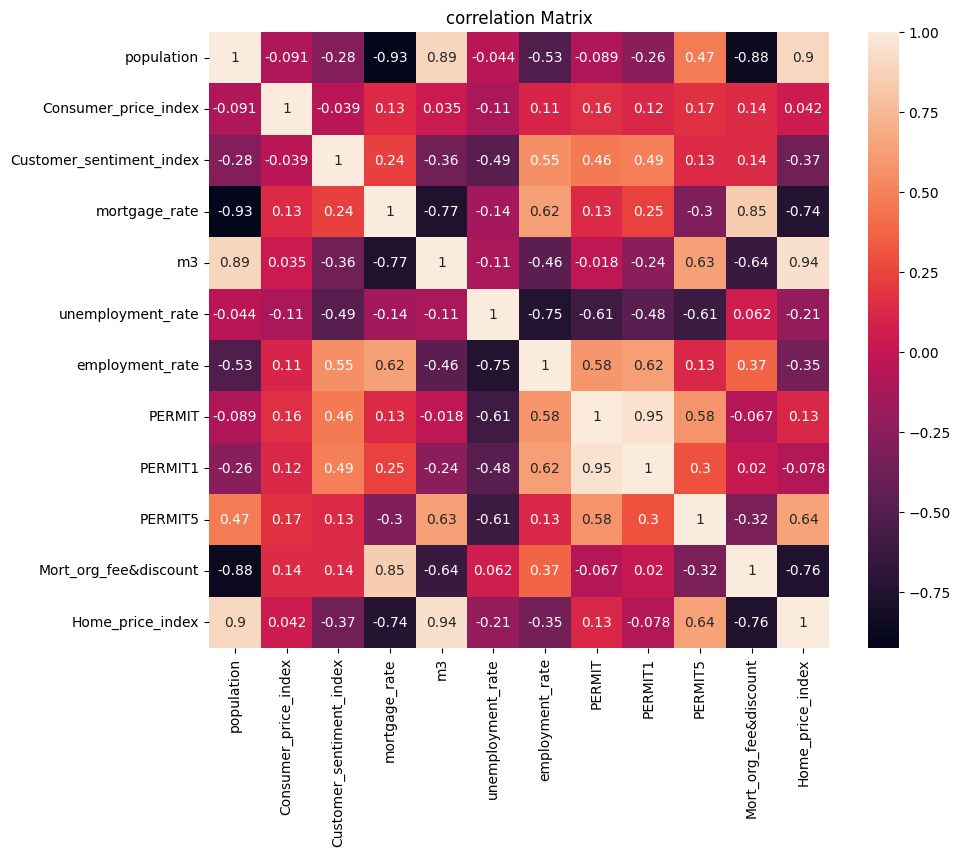

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the DataFrame
cor = merged_scaler_df1.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(cor, annot=True)

# Set the title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()



#### **Observation**

Upon examining the correlation heatmap, we observe that there is a strong positive linear relationship between '**m3**' and the **Home Price Index**. Additionally, variables such as **Population**, **More than 5 units building permits**, and **the Consumer Price Index** exhibit positive correlations with the Home Price Index. This suggests that when these factors increase, the home prices also tend to increase. On the contrary, variables like **Mortgage Organizational fees & discount**, **Mortgage Rate**, **Consumer Sentiment Index**, **employment**, and **unemployment** display negative relationships with the Home Price Index. In other words, as these factors rise, home prices generally decrease.

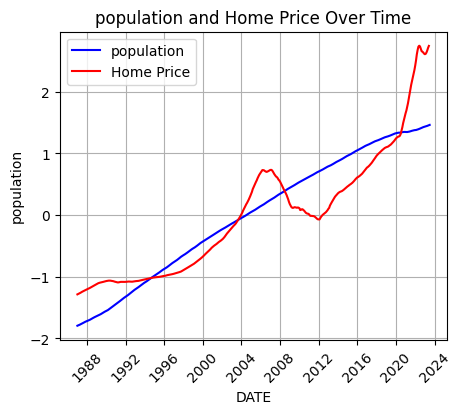

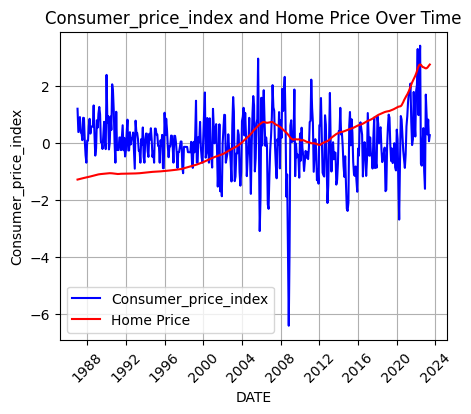

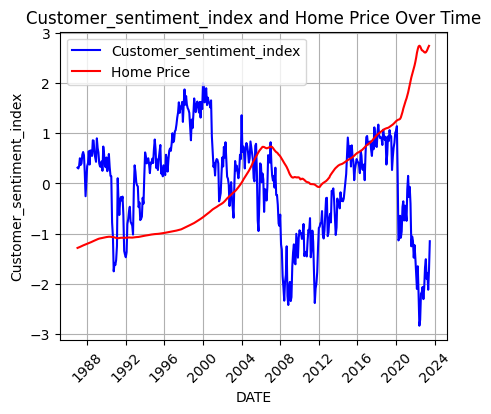

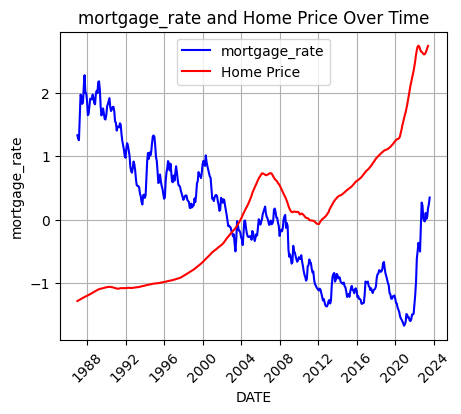

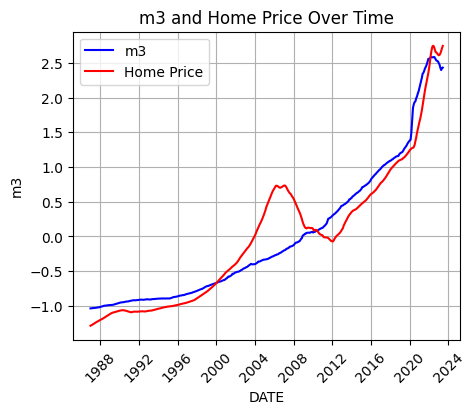

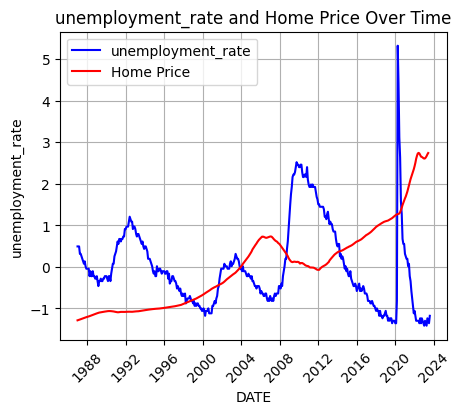

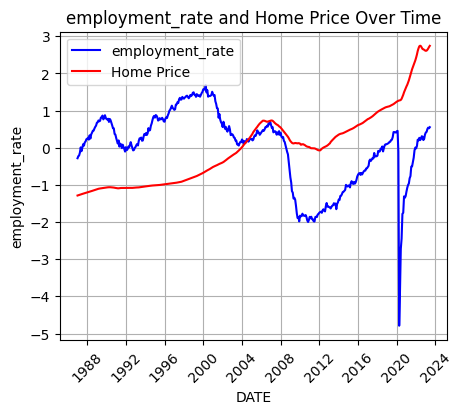

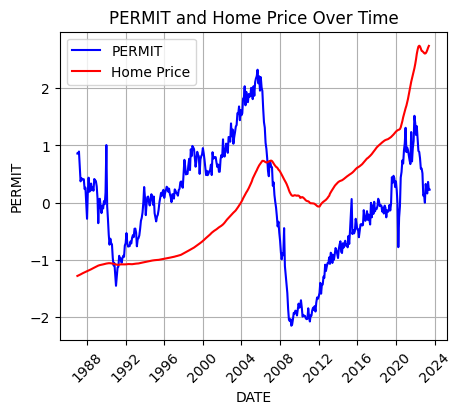

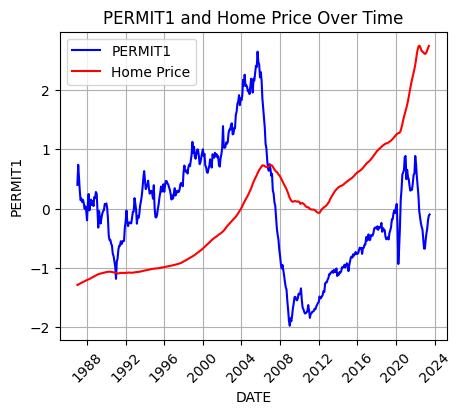

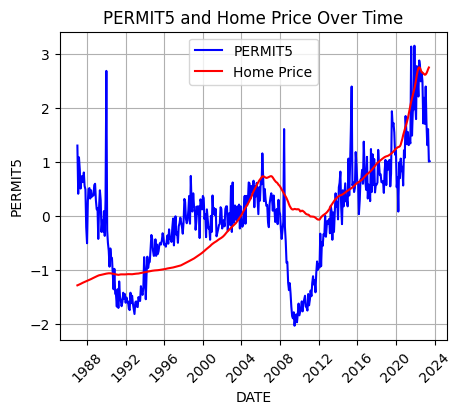

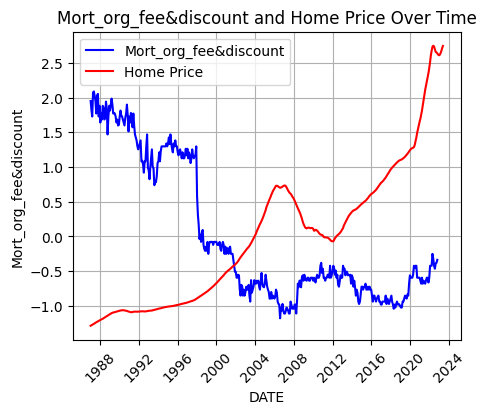

In [ ]:
# Iterate over columns and create line graphs against 'DATE' with 'Home_price_index'
for column_name in merged_scaler_df1.columns:
    if column_name != 'DATE' and column_name != 'Home_price_index':
        # Create a new figure for each plot (adjust the figure size if needed)
        plt.figure(figsize=(5, 4))

        # Plot the column against 'DATE'
        plt.plot(merged_scaler_df1['DATE'], merged_scaler_df1[column_name], label=column_name, linestyle='-', color='blue')

        # Plot 'Home_price_index' against 'DATE'
        plt.plot(merged_scaler_df1['DATE'], merged_scaler_df1['Home_price_index'], label='Home Price', linestyle='-', color='red')

        # Set labels, title, and legend
        plt.xlabel('DATE')
        plt.ylabel(column_name)
        plt.title(f'{column_name} and Home Price Over Time')
        plt.legend()

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Enable gridlines
        plt.grid(True)

        # Show the plot
        plt.show()


#### **Observation**
 1.  **Population**: Population and Home Price Index line graph is very similar, but after 2020 Home price increased explonentialy and population slightly decreased.

2.  **Consumer Price Index**: Consumer Price Index and Home Price Index have positive relation.

3.  **Customer Index**: Customer Sentiment Index and Home Price Index have very similar positive trend till 2020. after that have very negetive relation.

4.  **Mortgage Rate Index**: Mortgage Rate Index and Home Price Index have Negetive Relation till 2020. After 2020 both are increasing explonentialy.

5.  **M3**: M3 index and Home Price Index have linearly positive relation.

6.  **Emploment Rate**: Employment rate and Home Price Index have very postive relation. when employment rate increased home price also increased.

7. **Unemployment Rate** : Unemployment rate and Home Price Index have negetive relationship. When unemployment rate increased then home price decreased.

8. **New House Permit(PERMIT)** : It have very positive relation with Home Price Index till 2020. after that Home price increase explonentialy and new house permit start decreasing.

9. **More Than 1, 2 Unit House Permit(PERMIT1):** It have very same relation with Home Price Index like PERMIT.

10. **More than 5 units Building Permit(PERMIT5):** PERMIT 5 have very positive relation with Home Price Index even after 2020.

11. **Mortgage Org Fees & Discount:** It have very negetive relation with Home Price Index.








#### **Merged_df2 data analysis**

In [ ]:
#merged_df2 = pd.read_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_df2.pkl')
merged_df2.head()

,DATE,GDP,GDI,Home_price_index
0,1987-01-01,4722.156,4652.187,64.374667
1,1987-04-01,4806.160,4759.142,65.588333
2,1987-07-01,4884.555,4864.953,66.924667
3,1987-10-01,5007.994,4969.278,68.116333
4,1988-01-01,5073.372,5068.055,69.252667


In [ ]:
# List of columns to be scaled
columns_to_scaler = ['GDP', 'GDI', 'Home_price_index']

# Extract the data to be scaled from the 'merged_df2' DataFrame
data_to_scaler = merged_df2[columns_to_scaler]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaler_data = scaler.fit_transform(data_to_scaler)

# Create a new DataFrame with the scaled data, maintaining column names
merged_scl_df2 = pd.DataFrame(scaler_data, columns=columns_to_scaler)

# Add the 'DATE' column back to the DataFrame
merged_scl_df2['DATE'] = merged_df2['DATE']

# Display the first few rows of the scaled DataFrame
merged_scl_df2.head()


,GDP,GDI,Home_price_index,DATE
0,0.000000,0.000000,0.000000,1987-01-01
1,0.003805,0.004941,0.005084,1987-04-01
2,0.007356,0.009828,0.010681,1987-07-01
3,0.012948,0.014648,0.015673,1987-10-01
4,0.015909,0.019210,0.020432,1988-01-01


In [ ]:
# Save the 'merged_scl_df2' DataFrame as a pickle file
merged_scl_df2.to_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_scl_df2.pkl')


In [5]:
merged_scl_df2.shape

(146, 4)

<ipython-input-27-efe3d00921b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_scl_df2.corr()


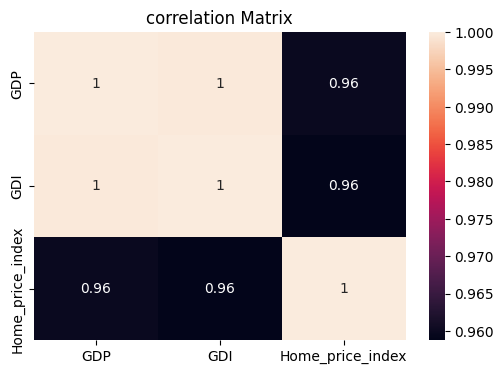

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Calculate the correlation matrix for the DataFrame
cor = merged_scl_df2.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(cor, annot=True)

# Set the title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


#### **Observation**

Gross Domestic Income (GDI) and Gross Domestic Product (GDP) exhibit a highly positive correlation with the Home Price Index, with a remarkable similarity of 96%. This substantial similarity between GDI, GDP, and the Home Price Index stands out as the highest among all the indicators examined.

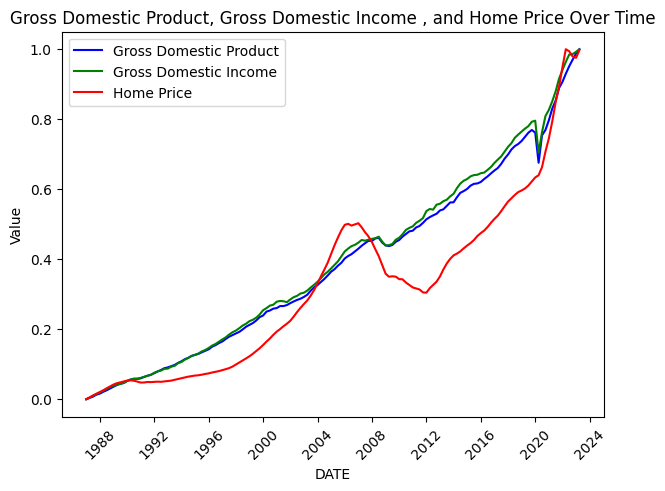

In [ ]:

# Create the line graph
plt.figure(figsize=(7, 5))  # Adjust the figure size if needed

# Plot 'DATE' vs. 'GDP'
plt.plot(merged_scl_df2['DATE'], merged_scl_df2['GDP'], label='Gross Domestic Product', linestyle='-', color='blue')

# Plot 'DATE' vs. 'GDI'
plt.plot(merged_scl_df2['DATE'], merged_scl_df2['GDI'], label='Gross Domestic Income', linestyle='-', color='green')

# Plot 'DATE' vs. 'hpi'
plt.plot(merged_scl_df2['DATE'], merged_scl_df2['Home_price_index'], label='Home Price', linestyle='-', color='red')

# Set labels and title
plt.xlabel('DATE')
plt.ylabel('Value')
plt.title('Gross Domestic Product, Gross Domestic Income , and Home Price Over Time')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
#plt.grid(True)
plt.show()


#### **Observation**

In this analysis, we observe a positive relationship between GDP, GDI, and the Home Price Index. This suggests that when people's income increases, there is a corresponding increase in house prices.

#### **Merged_df3 Data Analysis**

In [ ]:
#merged_df3 = pd.read_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_df3.pkl')
merged_df3.head()

,DATE,Human_capital_index,Home_price_index,$1 adjusted for inflation,inflation rate
0,1987-01-01,3.408786,66.251000,1.00,0.04
1,1988-01-01,3.417534,71.134167,1.04,0.04
2,1989-01-01,3.426304,75.502000,1.09,0.05
3,1990-01-01,3.435097,76.936167,1.15,0.05
4,1991-01-01,3.452302,75.921667,1.20,0.04


In [ ]:
# List of columns to be scaled
columns_to_scaler = ['Human_capital_index', 'Home_price_index', '$1 adjusted for inflation', 'inflation rate']

# Extract the data to be scaled from the 'merged_df3' DataFrame
data_to_scaler = merged_df3[columns_to_scaler]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaler_data = scaler.fit_transform(data_to_scaler)

# Create a new DataFrame with the scaled data, maintaining column names
merged_scl_df3 = pd.DataFrame(scaler_data, columns=columns_to_scaler)

# Add the 'DATE' column back to the DataFrame
merged_scl_df3['DATE'] = merged_df3['DATE']

# Display the first few rows of the scaled DataFrame
merged_scl_df3.head()


,Human_capital_index,Home_price_index,$1 adjusted for inflation,inflation rate,DATE
0,0.000000,0.000000,0.000,0.8,1987-01-01
1,0.025686,0.034095,0.032,0.8,1988-01-01
2,0.051439,0.064592,0.072,1.0,1989-01-01
3,0.077257,0.074605,0.120,1.0,1990-01-01
4,0.127781,0.067522,0.160,0.8,1991-01-01


In [ ]:
# Save the 'merged_scl_df3' DataFrame as a pickle file
merged_scl_df3.to_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_scl_df3.pkl')


In [7]:
merged_scl_df3.shape

(33, 5)

<ipython-input-38-b29d0490fb76>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_scl_df3.corr()


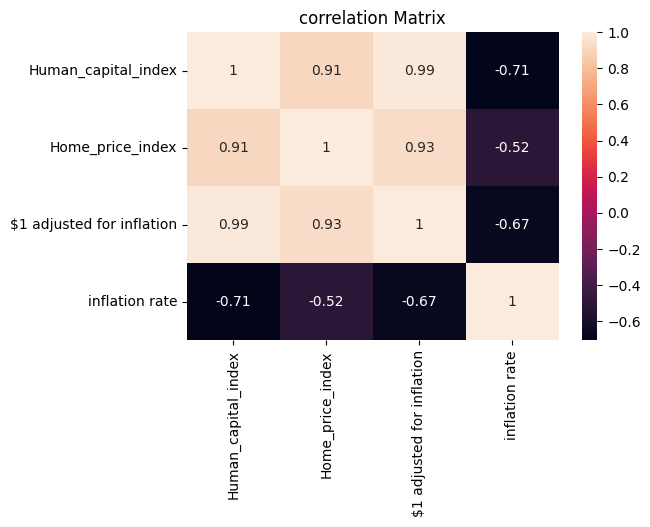

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Calculate the correlation matrix for the DataFrame
cor = merged_scl_df3.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(cor, annot=True)

# Set the title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


#### **Observation**

In the heatmap of the correlation matrix, a notably strong positive relationship is evident between the variables: "$ 1 in 1987, adjusted inflation" and the Home Price Index. Additionally, the "Human Capital Index" also exhibits a notably strong positive correlation with the Home Price Index.

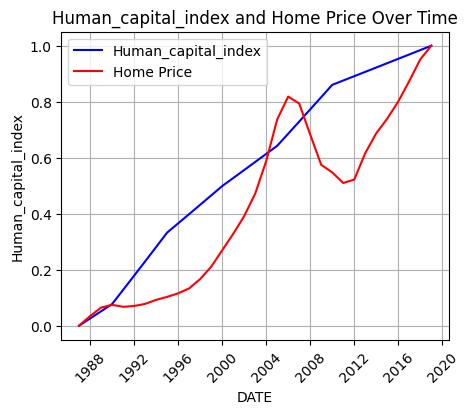

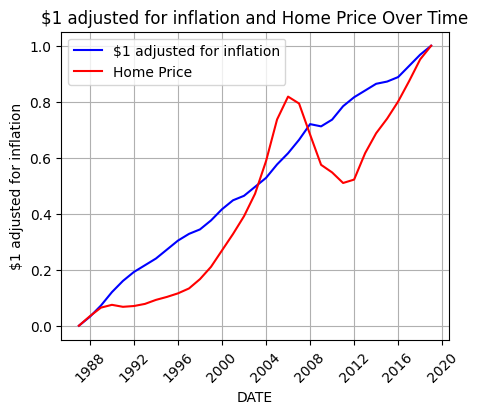

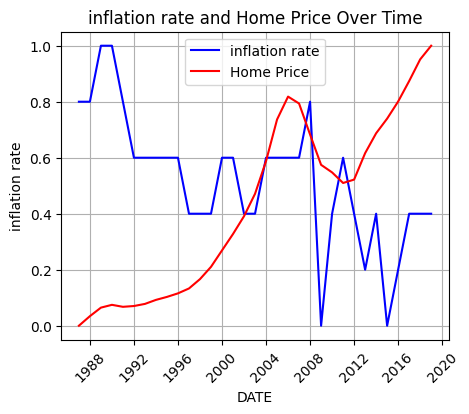

In [ ]:
# Iterate over columns and create line graphs against 'DATE' with 'Home_price_index'
for column_name in merged_scl_df3.columns:
    if column_name != 'DATE' and column_name != 'Home_price_index':
        # Create a new figure for each plot (adjust the figure size if needed)
        plt.figure(figsize=(5, 4))

        # Plot the column against 'DATE'
        plt.plot(merged_scl_df3['DATE'], merged_scl_df3[column_name], label=column_name, linestyle='-', color='blue')

        # Plot 'Home_price_index' against 'DATE'
        plt.plot(merged_scl_df3['DATE'], merged_scl_df3['Home_price_index'], label='Home Price', linestyle='-', color='red')

        # Set labels, title, and legend
        plt.xlabel('DATE')
        plt.ylabel(column_name)
        plt.title(f'{column_name} and Home Price Over Time')
        plt.legend()

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Enable gridlines
        plt.grid(True)

        # Show the plot
        plt.show()


#### **Observation**


In the line plot, it's apparent that $ 1 in 1987, adjusted inflation and the Human Capital Index have a positive relationship with the House Price Index. This suggests that as 1 dollar in 1987, adjusted inflation and the Human Capital Index increase, the House Price Index tends to rise as well. Conversely, inflation shows a negative relationship with the House Price Index, indicating that as inflation increases, house prices tend to decrease.

#### **Merged_df4 Data Analysis**

In [ ]:
#merged_df4 = pd.read_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_df4.pkl')
merged_df4.head()

,DATE,Total_house,Home_price_index
0,2000-04-01,116047.0,103.674333
1,2000-07-01,116482.0,105.786333
2,2000-10-01,116914.0,108.274333
3,2001-01-01,117347.0,110.484333
4,2001-04-01,117786.0,112.203333


In [51]:
# List of columns to be standardized
columns_to_standardize = ['Total_house', 'Home_price_index']

# Extract the data to be standardized from the 'merged_df4' DataFrame
data_to_standardize = merged_df4[columns_to_standardize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
standardized_data = scaler.fit_transform(data_to_standardize)

# Create a new DataFrame with the standardized data, maintaining column names
merged_std_df4 = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Add the 'DATE' column back to the DataFrame
merged_std_df4['DATE'] = merged_df4['DATE']

# Display the first few rows of the standardized DataFrame
merged_std_df4.head()


,Total_house,Home_price_index,DATE
0,-2.060047,-1.509267,2000-04-01
1,-2.003042,-1.464826,2000-07-01
2,-1.946430,-1.412472,2000-10-01
3,-1.889687,-1.365968,2001-01-01
4,-1.832158,-1.329796,2001-04-01


<ipython-input-52-5fda4f1bedbb>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = merged_std_df4.corr()


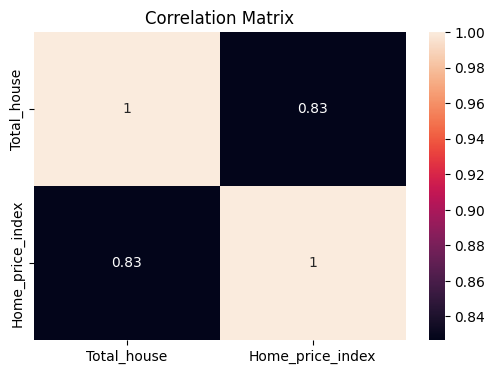

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(6, 4))

# Calculate the correlation matrix for the DataFrame
cor = merged_std_df4.corr()

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(cor, annot=True)

# Set the title for the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
# Save the 'merged_df4' DataFrame as a pickle file
merged_df4.to_pickle('/content/drive/MyDrive/USA_House_price_analysis/merged_df4.pkl')

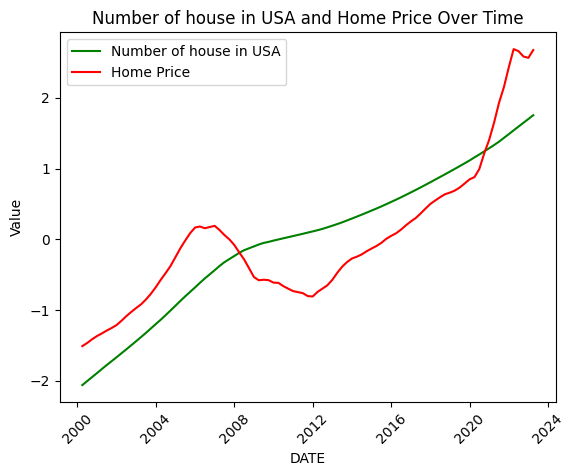

In [ ]:
# Plot 'DATE' vs. 'GDI'
plt.plot(merged_std_df4['DATE'], merged_std_df4['Total_house'], label='Number of house in USA', linestyle='-', color='green')

# Plot 'DATE' vs. 'hpi'
plt.plot(merged_std_df4['DATE'], merged_std_df4['Home_price_index'], label='Home Price', linestyle='-', color='red')

# Set labels and title
plt.xlabel('DATE')
plt.ylabel('Value')
plt.title('Number of house in USA and Home Price Over Time')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
#plt.grid(True)
plt.show()

#### **Observation**

In this graph, a clear and linear positive relationship is evident between the Number of House Index and the House Price Index. Notably, there is an exponential decrease in the House Price Index around the year 2008, likely indicating the impact of a housing market downturn. Conversely, after 2020, there is a notable exponential increase in house prices, suggesting a period of significant growth in the housing market.

## **Experimenting with Machine Learning**

We now have a total of four datasets. The first dataset, named "merged_scaler_df1," comprises 13 columns and contains 440 rows of data. The second dataset, "merged_scl_df2," is composed of 4 columns and 146 rows. Moving on to the third dataset, "merged_scl_df3," it consists of 5 columns and 33 rows. Lastly, the fourth dataset, "merged_df4," encompasses 3 columns and 93 rows.

It's worth noting that the first dataset, "merged_scaler_df1," is the most substantial, with a shape of (440, 13). Consequently, this dataset will be used for our data modeling endeavors. As for the other datasets, they contain insufficient data points to adequately train a machine learning model.

#### **Goals**
Determine which variables are most important for **USA Home Price**

 **"We are dealing with a regression problem, which means our objective is to predict numerical values. Consequently, we are exclusively utilizing regression models to identify the most relevant features for our task."**

In [12]:
# Read the pickle file into a Pandas DataFrame
merged_scaler_df1 = pd.read_pickle("/content/drive/MyDrive/USA_House_price_analysis/merged_scaler_df1")

In [ ]:
# printing top 5 row
merged_scaler_df1.head()

,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount,Home_price_index,DATE
0,0.000000,0.774963,0.651613,0.760261,0.000000,0.283186,0.696303,0.672571,0.514031,0.643411,0.957895,0.000000,1987-01-01
1,0.001583,0.691722,0.648387,0.746094,0.000527,0.283186,0.705113,0.672000,0.587269,0.471318,0.915789,0.001906,1987-02-01
2,0.003306,0.718575,0.658065,0.740555,0.000527,0.283186,0.707438,0.680571,0.544148,0.601550,0.889474,0.003197,1987-03-01
3,0.005146,0.745090,0.690323,0.833547,0.001582,0.256637,0.719790,0.621714,0.492813,0.558140,0.994737,0.004841,1987-04-01
4,0.007050,0.690266,0.662903,0.922575,0.001582,0.256637,0.741564,0.564000,0.457906,0.489922,1.000000,0.006635,1987-05-01


In [ ]:
merged_scaler_df1.shape

(440, 13)

In [13]:
# checking null values
merged_scaler_df1.isnull().sum()

population                  1
Consumer_price_index        2
Customer_sentiment_index    1
mortgage_rate               0
m3                          2
unemployment_rate           0
employment_rate             2
PERMIT                      1
PERMIT1                     1
PERMIT5                     1
Mort_org_fee&discount       9
Home_price_index            2
DATE                        0
dtype: int64

In [14]:
# Removing rows with missing (NaN) values from the DataFrame 'merged_scaler_df1'
merged_scaler_df1 = merged_scaler_df1.dropna()

# Checking and print the number of missing values (NaN) in each column of the DataFrame
missing_values = merged_scaler_df1.isnull().sum()


In [16]:
# Removing the 'DATE' column from 'merged_scaler_df1' DataFrame
merged_std_df1 = merged_scaler_df1.drop(['DATE'], axis=1)
merged_scaler_df1.head()

,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount,Home_price_index,DATE
0,0.000000,0.774963,0.651613,0.760261,0.000000,0.283186,0.696303,0.672571,0.514031,0.643411,0.957895,0.000000,1987-01-01
1,0.001583,0.691722,0.648387,0.746094,0.000527,0.283186,0.705113,0.672000,0.587269,0.471318,0.915789,0.001906,1987-02-01
2,0.003306,0.718575,0.658065,0.740555,0.000527,0.283186,0.707438,0.680571,0.544148,0.601550,0.889474,0.003197,1987-03-01
3,0.005146,0.745090,0.690323,0.833547,0.001582,0.256637,0.719790,0.621714,0.492813,0.558140,0.994737,0.004841,1987-04-01
4,0.007050,0.690266,0.662903,0.922575,0.001582,0.256637,0.741564,0.564000,0.457906,0.489922,1.000000,0.006635,1987-05-01


In [17]:
# Splitting the dataset into features (X) and target variable (y) for machine learning.
# Then, splitting the data into training and testing sets.

# 'y' contains the 'Home_price_index' column, which is the target variable.
y = merged_std_df1['Home_price_index']

# 'X' contains all the features except 'Home_price_index' (the predictors).
X = merged_std_df1.drop(['Home_price_index'], axis=1)

# Using train_test_split to create training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(344, 11)
(344,)
(87, 11)
(87,)


In [ ]:
y_train.head()

368    0.538958
403    0.658159
78     0.055902
141    0.115220
385    0.593007
Name: Home_price_index, dtype: float64

In [ ]:
X_train.head()

,population,Consumer_price_index,Customer_sentiment_index,mortgage_rate,m3,unemployment_rate,employment_rate,PERMIT,PERMIT1,PERMIT5,Mort_org_fee&discount
368,0.914552,0.743343,0.727419,0.130714,0.579114,0.079646,0.718185,0.436571,0.337440,0.502326,0.086842
403,0.962994,0.678224,0.388710,0.029268,0.823312,0.442478,0.464901,0.600571,0.498973,0.551938,0.231579
78,0.198498,0.582350,0.435484,0.527285,0.036920,0.309735,0.779072,0.377714,0.438056,0.088372,0.663158
141,0.377471,0.656691,0.764516,0.469450,0.082806,0.097345,0.954848,0.689143,0.602327,0.534884,0.305263
385,0.941512,0.710875,0.706452,0.196595,0.618671,0.035398,0.757798,0.450857,0.316222,0.586047,0.047368


#### **DecisionTreeRegressor Model**

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
tree_model = DecisionTreeRegressor()  # You can adjust the max_depth hyperparameter

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a DecisionTreeRegressor model with the best hyperparameters
best_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'])


# Fit the model to the training data
best_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00016648108435715636


In [46]:
feature_importances = best_tree_model.feature_importances_

# Assuming you have already calculated the feature importances
importance_features = list(zip(X.columns, feature_importances))

# Sort the list in descending order of feature importances
importance_features_sorted = sorted(importance_features, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_features_sorted:
    print(f"{feature}: {importance}")

m3: 0.7334955337816257
population: 0.22818435252150418
unemployment_rate: 0.031904292246392595
Mort_org_fee&discount: 0.002726632902913623
employment_rate: 0.0017705037108679772
mortgage_rate: 0.001040581245042088
PERMIT1: 0.000603324007296465
PERMIT: 0.00016132441054107606
PERMIT5: 5.244497205718609e-05
Consumer_price_index: 4.658858643530405e-05
Customer_sentiment_index: 1.4421615323781477e-05


#### **Observation**

**Based on the analysis conducted with this model, it has been identified that the most influential factors affecting the USA Home Price are, in descending order of importance, M3, Population, Unemployment Rate, and Mortgage Organization Fees & Discounts.**

#### **Lasso Model**

In [37]:
from sklearn.linear_model import Lasso

# Create a lasso regression model
lasso_model = Lasso() # You can adjust the alpha hyperparameter

param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_lasso = Lasso(alpha=best_params['alpha'])

# Fit the model to the training data
best_lasso.fit(X_train, y_train)

y_pred = best_lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.006385623218152029


In [47]:
coefficients = best_lasso.coef_

# Combine feature names and coefficients using zip
importance_feature = list(zip(X.columns, coefficients))

# Sort the list in descending order of coefficients
importance_feature_sorted = sorted(importance_feature, key=lambda x: abs(x[1]), reverse=True)

# Print the sorted feature coefficients
for feature, coefficient in importance_feature_sorted:
    print(f"{feature}: {coefficient}")

m3: 0.5606837599480693
Mort_org_fee&discount: -0.13199589243822946
population: 0.040085853582720925
Consumer_price_index: 0.0
Customer_sentiment_index: -0.0
mortgage_rate: -0.0
unemployment_rate: -0.0
employment_rate: 0.0
PERMIT: 0.0
PERMIT1: 0.0
PERMIT5: 0.0


#### **Observation**

**Based on the analysis conducted with this model, it has been identified that the most influential factors affecting the USA Home Price are, in descending order of importance, M3, Mortgage Organization Fees & Discounts and Population.**

#### **Gradient Boosting Regressor**

In [28]:
# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Gradient Boosting Regressor model with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

# Fit the best model to the training data
best_gb_regressor.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred_best = best_gb_regressor.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model Mean Squared Error: {mse_best}")


Best Model Mean Squared Error: 4.0710307720907446e-05


In [48]:
feature_importances = best_gb_regressor.feature_importances_

# Assuming you have already calculated the feature importances
importance_features = list(zip(X.columns, feature_importances))

# Sort the list in descending order of feature importances
importance_features_sorted = sorted(importance_features, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in importance_features_sorted:
    print(f"{feature}: {importance}")

population: 0.5475156665711257
m3: 0.4079142466598929
unemployment_rate: 0.03573076601831929
Mort_org_fee&discount: 0.003924185415146351
mortgage_rate: 0.0016529668560125704
PERMIT1: 0.0010053913201857087
employment_rate: 0.0007519083241097052
PERMIT: 0.0007341191856928611
Customer_sentiment_index: 0.0004388693215979569
PERMIT5: 0.0002610969883395385
Consumer_price_index: 7.078333957724e-05


#### **Observation**

**Based on the analysis conducted with this model, it has been identified that the most influential factors affecting the USA Home Price are, in descending order of importance, Population, m3, Unemployment Rate, and Mortgage Organization Fees & Discounts.**

## **Finding**

**Following an extensive data analysis and modeling process, it has become evident that there are nine factors displaying significant positive and negative correlations with the USA Home Price. These factors exert their influence on the national landscape of the USA Home Price.**

1. **Gross Domestic Income**
2. **Gross Domestic Product**
3. **M3**
4. **Inflation**
5. **Human Capital Index**
6. **Population**
7. **Number of house**
8. **Mortgage Rate**
9. **Mortgage Organizational Fees & Discount**
